### Umbrella Sampling PMF Graph - All Three

In [46]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [47]:
# Set the file path to the Excel file containing the stress-strain data.
data_file_na_all = r'Z:/UW_Madison_Jiahui/projects/PA_Membrane/mem_moy/subhamoy_swiss_itp/nacl_single/na-direction/S6_re_all/umbrellaS_re/bsResult.xvg'
data_file_na_sym= r'Z:/UW_Madison_Jiahui/projects/PA_Membrane/mem_moy/subhamoy_swiss_itp/nacl_single/na-direction/S6_re_cycl/umbrellaS_re/bsResult.xvg'
data_file_na_iact = r'Z:/UW_Madison_Jiahui/projects/PA_Membrane/mem_moy/subhamoy_swiss_itp/nacl_single/na-direction/S6_re_iact_periodic_calculated/umbrellaS_re/bsResult.xvg'

# Load data from the specified text file into a NumPy array.
data_array_na_all = np.loadtxt(data_file_na_all, comments=('#', '@'))
data_array_na_sym = np.loadtxt(data_file_na_sym, comments=('#', '@'))
data_array_na_iact = np.loadtxt(data_file_na_iact, comments=('#', '@'))

# Print the shape of the array.
print("Data shape:", data_array_na_all.shape)
print("Data shape:", data_array_na_sym.shape)
print("Data shape:", data_array_na_iact.shape)

Data shape: (300, 3)
Data shape: (300, 3)
Data shape: (300, 3)


In [48]:
low = -6
up = 6

# Filtering condition: Select rows where the first element in the second dimension
condition_na_all = (data_array_na_all[:, 0] >= low) & (data_array_na_all[:, 0] <= up)
condition_na_sym = (data_array_na_sym[:, 0] >= low) & (data_array_na_sym[:, 0] <= up)
condition_na_iact = (data_array_na_iact[:, 0] >= low) & (data_array_na_iact[:, 0] <= up)

# Use the condition to filter rows.
filtered_data_na_all = data_array_na_all[condition_na_all]
filtered_data_na_sym = data_array_na_sym[condition_na_sym]
filtered_data_na_iact = data_array_na_iact[condition_na_iact]

# Print the shape of the filtered array.
print("Filtered Data shape:", filtered_data_na_all.shape)
print("Filtered Data shape:", filtered_data_na_sym.shape)
print("Filtered Data shape:", filtered_data_na_iact.shape)

Filtered Data shape: (300, 3)
Filtered Data shape: (300, 3)
Filtered Data shape: (300, 3)


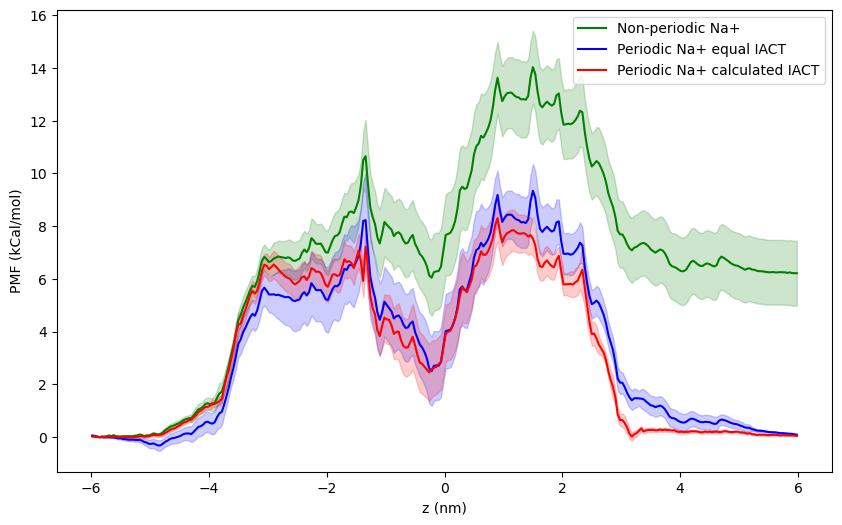

In [49]:
# Extract the first column as the x-axis data.
x_na_all = filtered_data_na_all[:, 0]
x_na_sym = filtered_data_na_sym[:, 0]
x_na_iact = filtered_data_na_iact[:, 0]

# Extract the second column as the y-axis data.
y_na_all = filtered_data_na_all[:, 1]
y_na_sym = filtered_data_na_sym[:, 1]
y_na_iact = filtered_data_na_iact[:, 1]

# Extract the third column as the y-axis error data.
error_na_all = filtered_data_na_all[:, 2]
error_na_sym = filtered_data_na_sym[:, 2]
error_na_iact = filtered_data_na_iact[:, 2]

# Assume the first value in the y-axis data for each ion is the baseline to subtract
baseline_all = y_na_all[3]
baseline_sym = y_na_sym[3]
baseline_iact = y_na_iact[3]

# Subtract the baseline value from the y-axis data to shift the starting point to 0
adjusted_y_all = y_na_all - baseline_all
adjusted_y_sym = y_na_sym - baseline_sym 
adjusted_y_iact = y_na_iact - baseline_iact

# Create a figure for the plot with a specific size.
plt.figure(figsize=(10, 6))

# Plot the x and y data.
plt.plot(x_na_all, adjusted_y_all, label='Non-periodic Na+', color='green')
plt.plot(x_na_sym, adjusted_y_sym, label='Periodic Na+ equal IACT', color='blue')
plt.plot(x_na_iact, adjusted_y_iact, label='Periodic Na+ calculated IACT', color='red')

# Fill the area around the Na+ curve with error bar as a shadow.
plt.fill_between(x_na_all, adjusted_y_all - error_na_all, adjusted_y_all + error_na_all, color='green', alpha=0.2)
plt.fill_between(x_na_sym, adjusted_y_sym - error_na_sym, adjusted_y_sym + error_na_sym, color='blue', alpha=0.2)
plt.fill_between(x_na_iact, adjusted_y_iact - error_na_iact, adjusted_y_iact + error_na_iact, color='red', alpha=0.2)

# Add labels for the x and y axes.
plt.xlabel("z (nm)")
plt.ylabel("PMF (kCal/mol)")

# Add a title to the plot.
# plt.title("GROMACS Energies")

# Display the legend.
plt.legend()

# Display the plot.
plt.show()


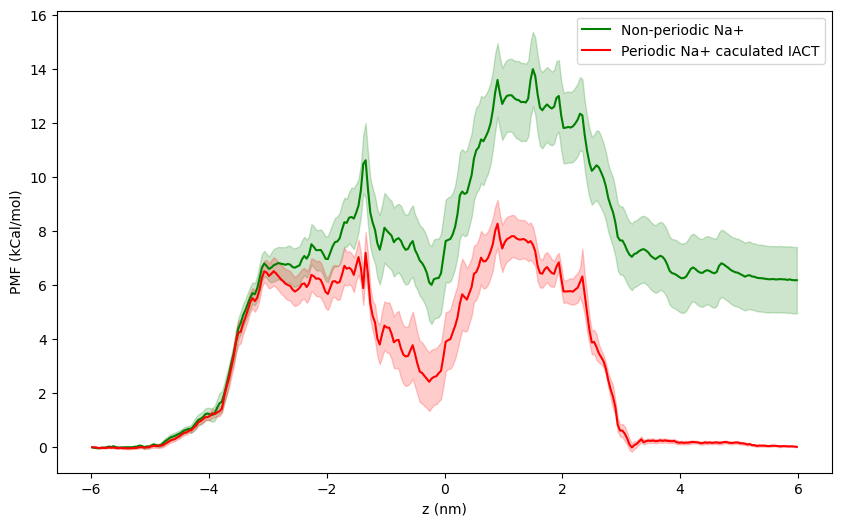

In [50]:
# Extract the first column as the x-axis data.
x_na_all = filtered_data_na_all[:, 0]
x_na_sym = filtered_data_na_sym[:, 0]
x_na_iact = filtered_data_na_iact[:, 0]

# Extract the second column as the y-axis data.
y_na_all = filtered_data_na_all[:, 1]
y_na_sym = filtered_data_na_sym[:, 1]
y_na_iact = filtered_data_na_iact[:, 1]

# Extract the third column as the y-axis error data.
error_na_all = filtered_data_na_all[:, 2]
error_na_sym = filtered_data_na_sym[:, 2]
error_na_iact = filtered_data_na_iact[:, 2]

# Create a figure for the plot with a specific size.
plt.figure(figsize=(10, 6))

# Plot the x and y data.
plt.plot(x_na_all, y_na_all, label='Non-periodic Na+', color='green')
#plt.plot(x_na_sym, y_na_sym, label='Non-periodic sym Na+', color='blue')
plt.plot(x_na_iact, y_na_iact, label='Periodic Na+ caculated IACT', color='red')

# Fill the area around the Na+ curve with error bar as a shadow.
plt.fill_between(x_na_all, y_na_all - error_na_all, y_na_all + error_na_all, color='green', alpha=0.2)
#plt.fill_between(x_na_sym, y_na_sym - error_na_sym, y_na_sym + error_na_sym, color='blue', alpha=0.2)
plt.fill_between(x_na_iact, y_na_iact - error_na_iact, y_na_iact + error_na_iact, color='red', alpha=0.2)

# Add labels for the x and y axes.
plt.xlabel("z (nm)")
plt.ylabel("PMF (kCal/mol)")

# Add a title to the plot.
# plt.title("GROMACS Energies")

# Display the legend.
plt.legend()

# Display the plot.
plt.show()
